<a href="https://colab.research.google.com/github/pSN0W/Iris/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Module

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tqdm.notebook as tq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from matplotlib.colors import ListedColormap
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from scipy.stats import *
import warnings
warnings.filterwarnings('ignore')

#Loading Data

In [ ]:
!wget https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv

--2021-06-08 19:38:17--  https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3716 (3.6K) [text/plain]
Saving to: ‘iris.csv’

iris.csv            100%[===================>]   3.63K  --.-KB/s    in 0s      

2021-06-08 19:38:17 (58.1 MB/s) - ‘iris.csv’ saved [3716/3716]



In [ ]:
iris = pd.read_csv("iris.csv")

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
iris['species'].value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Iris is a balanced dataset

#Data Analysis

##Getting Feature Importance

###Plot for sepal_length

####PDF for sepal_length

Text(0.5, 1.0, 'pdf of sepal_length')

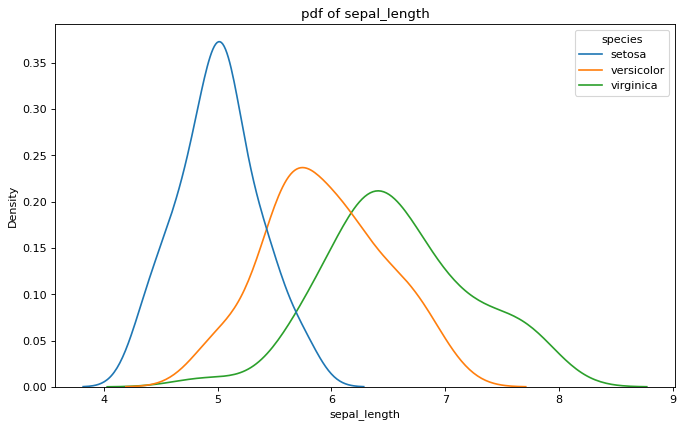

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.kdeplot(iris['sepal_length'],hue=iris['species'])
plt.title("pdf of sepal_length")

####Boxplot for sepal_length

Text(0.5, 1.0, 'Bow plot for sepal_length')

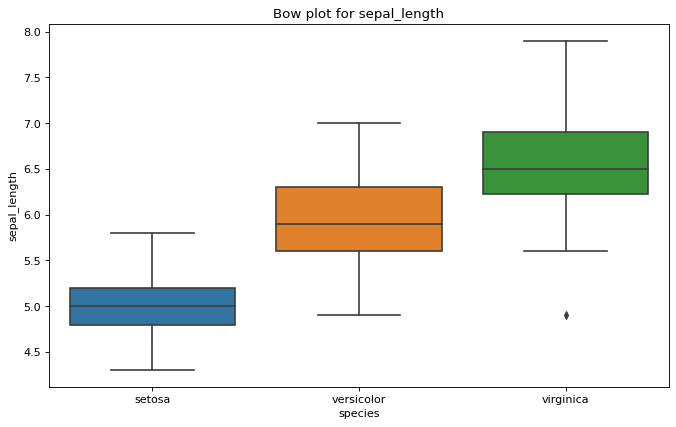

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.boxplot(x=iris['species'],y=iris['sepal_length'])
plt.title("Bow plot for sepal_length")

###Plot for sepal_width

####PDF for sepal_width

Text(0.5, 1.0, 'pdf of sepal_width')

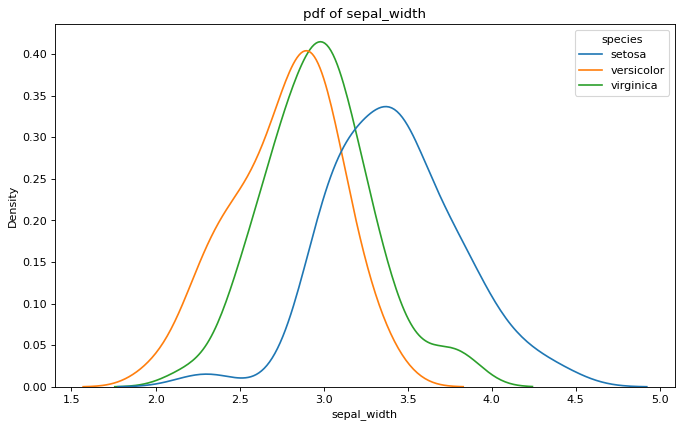

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.kdeplot(iris['sepal_width'],hue=iris['species'])
plt.title("pdf of sepal_width")

####BoxPlot for sepal_width

Text(0.5, 1.0, 'Bow plot for sepal_width')

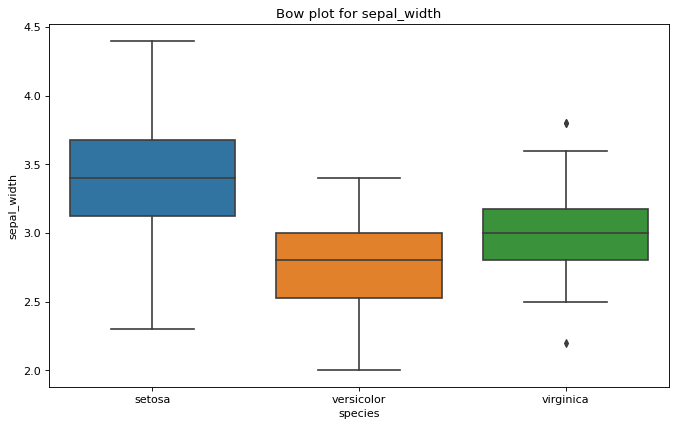

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.boxplot(x=iris['species'],y=iris['sepal_width'])
plt.title("Bow plot for sepal_width")

###Plot for petal_length

####PDF for petal_length

Text(0.5, 1.0, 'pdf of petal_length')

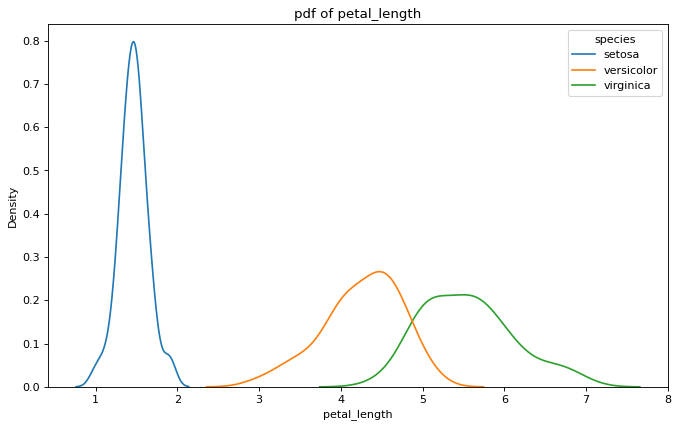

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.kdeplot(iris['petal_length'],hue=iris['species'])
plt.title("pdf of petal_length")

####BoxPlot for petal_length

Text(0.5, 1.0, 'Bow plot for petal_length')

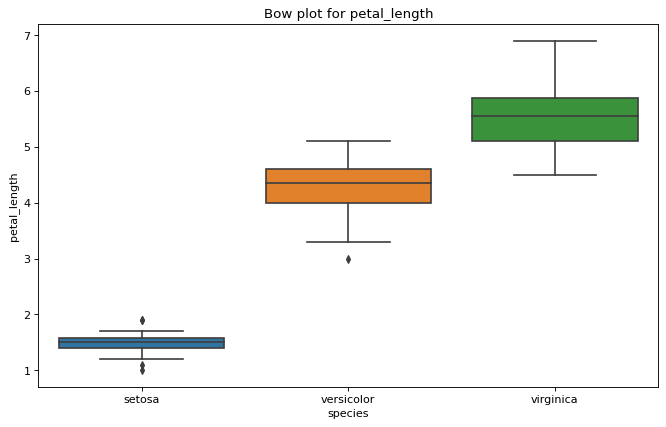

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.boxplot(x=iris['species'],y=iris['petal_length'])
plt.title("Bow plot for petal_length")

###Plot for petal_width

####PDF for petal_width

Text(0.5, 1.0, 'pdf of petal_width')

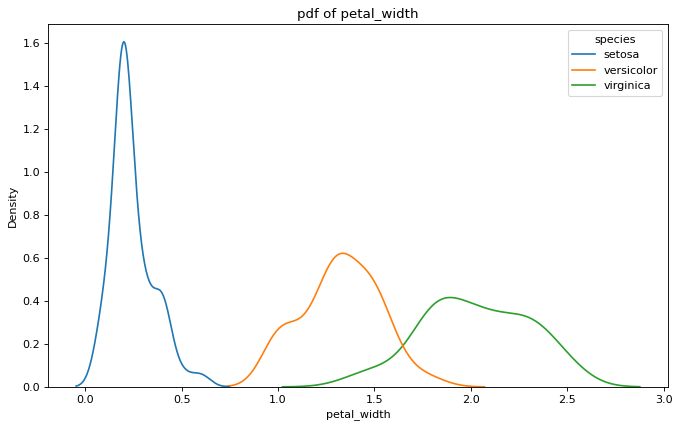

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.kdeplot(iris['petal_width'],hue=iris['species'])
plt.title("pdf of petal_width")

####BoxPlot for petal_width

Text(0.5, 1.0, 'Bow plot for petal_width')

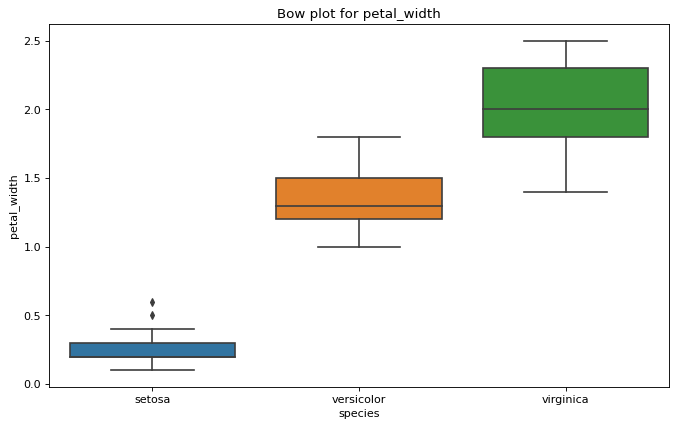

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.boxplot(x=iris['species'],y=iris['petal_width'])
plt.title("Bow plot for petal_width")

#Column Standorisation

In [ ]:
labels = iris['species']
iris = iris.drop('species',axis=1)
ss = StandardScaler()
iris = pd.DataFrame(ss.fit_transform(iris),columns=iris.columns)
iris['species'] = labels

In [ ]:
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,setosa
1,-1.143017,-0.124958,-1.341272,-1.312977,setosa
2,-1.385353,0.337848,-1.398138,-1.312977,setosa


#Dimensionality Reduction

In [ ]:
def tonumeric(phrase):
  if list(phrase) == list('setosa'):
    return 0
  if list(phrase) == list('virginica'):
    return 1
  return 2

In [ ]:
num = labels.map(tonumeric)
iris['species'] = num
iris.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0


In [ ]:
labels = num

##Using the available features

From the BoxPlots and PDFs we find that out of the 4 features petal_length and petal_width seperates the dataset best so the should be choosed 

###Breaking the data

In [ ]:
iris_2D_feat = iris.drop(['sepal_length','sepal_width','species'],axis=1)
iris_2D_label = iris['species']
iris_2D = pd.concat((iris_2D_feat,iris_2D_label),axis=1)

In [ ]:
iris_2D.head(3)

,petal_length,petal_width,species
0,-1.341272,-1.312977,0
1,-1.341272,-1.312977,0
2,-1.398138,-1.312977,0


In [ ]:
iris_2D_x_tr,iris_2D_x_test,iris_2D_y_tr,iris_2D_y_test = train_test_split(iris_2D_feat,iris_2D_label,test_size=0.2)
iris_2D_x_train,iris_2D_x_cv,iris_2D_y_train,iris_2D_y_cv = train_test_split(iris_2D_x_tr,iris_2D_y_tr,test_size=0.25)

In [ ]:
y=np.array(iris_2D_y_train)
dic={}
for i in y:
  dic.setdefault(i,0)
  dic[i]+=1
print(dic)

{1: 28, 2: 31, 0: 31}


###Plotting

Text(0.5, 1.0, 'iris dataset 2d plot')

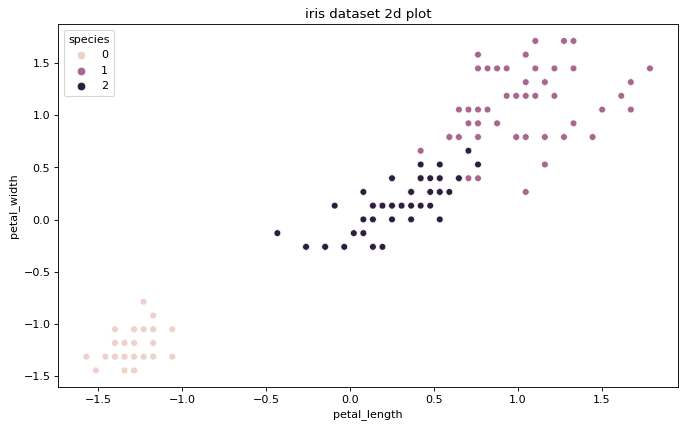

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.scatterplot(x=iris_2D['petal_length'],y=iris_2D['petal_width'],hue=iris_2D['species'])
plt.title('iris dataset 2d plot')

##Using PCA

In [ ]:
iris_feat = iris.drop('species',axis=1)

In [ ]:
pca = PCA(n_components=2)
pcaa = pca.fit_transform(iris_feat)
pcaa.shape

(150, 2)

In [ ]:
iris_pca = pd.DataFrame(data=pcaa,columns=['1st Principal Dimension','2nd Principal Dimension'])
iris_pca['species'] = labels
iris_pca.head(3)

,1st Principal Dimension,2nd Principal Dimension,species
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0


In [ ]:
iris_pca_feat = iris_pca.drop('species',axis=1)

In [ ]:
# Breaking into train test and CV
iris_pca_x_tr,iris_pca_x_test,iris_pca_y_tr,iris_pca_y_test = train_test_split(iris_pca_feat,labels,test_size=0.2)
iris_pca_x_train,iris_pca_x_cv,iris_pca_y_train,iris_pca_y_cv = train_test_split(iris_pca_x_tr,iris_pca_y_tr,test_size=0.25)

###Plotting

Text(0.5, 1.0, 'iris dataset 2d plot')

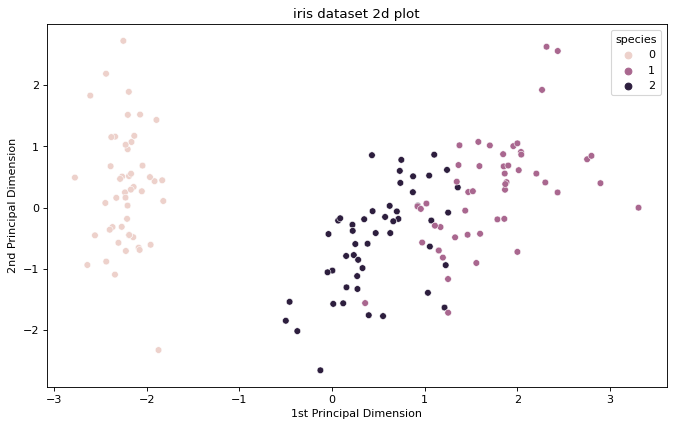

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.scatterplot(x=iris_pca['1st Principal Dimension'],y=iris_pca['2nd Principal Dimension'],hue=iris_pca['species'])
plt.title('iris dataset 2d plot')

##Using TSNE

In [ ]:
tsne = TSNE(n_components=2)
tsnee = tsne.fit_transform(iris_feat)
tsnee.shape

(150, 2)

In [ ]:
iris_tsne = pd.DataFrame(data=tsnee,columns=['1st Principal Dimension','2nd Principal Dimension'])
iris_tsne['species'] = labels
iris_tsne.head(3)

,1st Principal Dimension,2nd Principal Dimension,species
0,-19.579809,-12.522176,0
1,-16.985914,-9.881739,0
2,-17.268648,-11.276370,0


In [ ]:
iris_tsne_feat = iris_tsne.drop('species',axis=1)

In [ ]:
# Breaking into train test and CV
iris_tsne_x_tr,iris_tsne_x_test,iris_tsne_y_tr,iris_tsne_y_test = train_test_split(iris_tsne_feat,labels,test_size=0.2)
iris_tsne_x_train,iris_tsne_x_cv,iris_tsne_y_train,iris_tsne_y_cv = train_test_split(iris_tsne_x_tr,iris_tsne_y_tr,test_size=0.25)

###Plotting

Text(0.5, 1.0, 'iris dataset 2d plot')

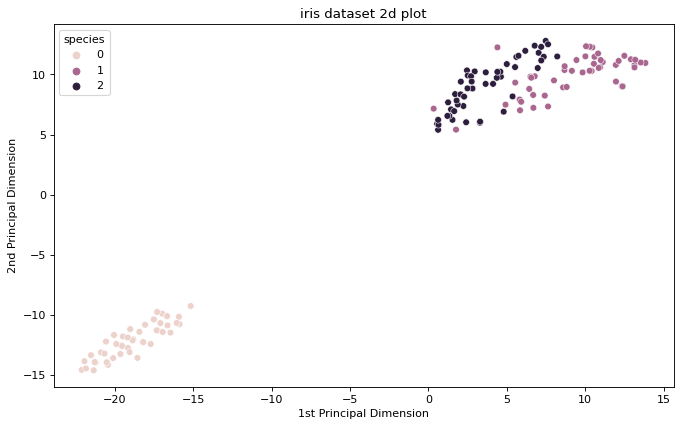

In [ ]:
plt.figure(figsize=[10,6],dpi=80)
sns.scatterplot(x=iris_tsne['1st Principal Dimension'],y=iris_tsne['2nd Principal Dimension'],hue=iris_tsne['species'])
plt.title('iris dataset 2d plot')

#Function to print Decision Surface

In [ ]:
def find_accuracy(clf):
  pred = clf.predict(np.array(X_test))
  acc = accuracy_score(np.array(Y_test),pred)
  return acc

In [ ]:
def decision_surface(data,clf):
  # For more info about this function go through knn decision surface notebook
  arr = np.array(data)
  X = arr[:,:2]
  Y = arr[:,2]
  h = 0.02
  cmap_light = ListedColormap(['#FFAAAA',  '#AAAAFF', '#ADFF2F'])
  cmap_bold = ListedColormap(['#FF0000', '#0000FF', '#228B22'])
  x_min = np.min(X[:,0])-1
  x_max = np.max(X[:,0])+1
  y_min = np.min(X[:,1])-1
  y_max = np.max(X[:,1])+1

  xx,yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

  Z = np.c_[np.ravel(xx),np.ravel(yy)]

  pred = clf.predict(Z)
  pred = pred.reshape(xx.shape)
  #Plotting the decision boundary
  plt.figure(figsize=(8, 6), dpi=80)
  plt.pcolormesh(xx, yy, pred, cmap=cmap_light)
  plt.scatter(X[:,0],X[:,1],c=Y,cmap=cmap_bold)
  plt.xlim(xx.min(),xx.max())
  plt.ylim(yy.min(),yy.max())
  plt.title("Decision Surface")
  plt.show()

#For 2D data

In [ ]:
X_data = iris_2D_x_tr
Y_data = iris_2D_y_tr
X_test = iris_2D_x_test
Y_test = iris_2D_y_test
dat = iris_2D

##K-NN

###Model

In [ ]:
knn = KNeighborsClassifier()

# Using Random Search to find the best k

par = dict(n_neighbors=randint(low=1,high=50))

rsearch = RandomizedSearchCV(knn,param_distributions=par,cv=10,n_jobs=-1,random_state=0)
search = rsearch.fit(X_data,Y_data)
k=search.best_params_['n_neighbors']
print(k)

1


In [ ]:
# Making our model

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_data,Y_data)
print("Accuracy of the K-NN model with k = {} is {}".format(k,find_accuracy(knn)*100))

Accuracy of the K-NN model with k = 1 is 96.66666666666667


###Decision Surface

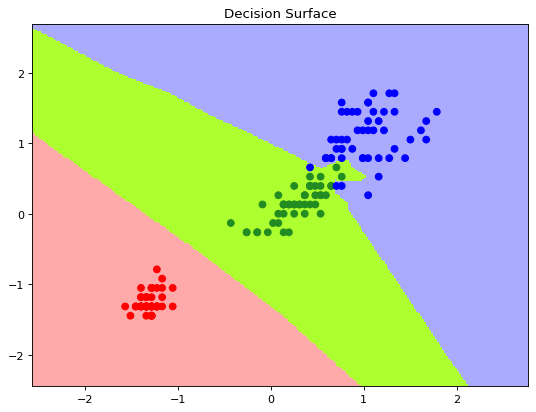

In [ ]:
decision_surface(dat,knn)

##Gaussian Naive Bayes

###Model

In [ ]:
gnb = GaussianNB()
gnb.fit(X_data,Y_data)
print("Accuracy of Gaussian Naive Bayes is ",find_accuracy(gnb)*100)

Accuracy of Gaussian Naive Bayes is  96.66666666666667


###Decision Surface

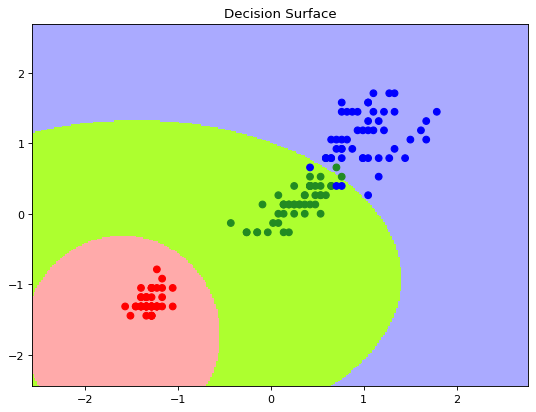

In [ ]:
decision_surface(dat,gnb)

##Bernoulli Naive Bayes

###Model

In [ ]:
bnb = BernoulliNB()
par = dict(alpha=uniform(loc=0,scale=1000))
rsearch = RandomizedSearchCV(bnb,par,cv=10)
search = rsearch.fit(X_data,Y_data)
alph = search.best_params_['alpha']
print(alph)

465.0124027079039


In [ ]:
# Defining Model
bnb = BernoulliNB(alpha=alph)
bnb.fit(X_data,Y_data)
print("The accuracy of Bernoulli Naive Bayes with alpha = {} is {}%".format(alph,find_accuracy(bnb)))

The accuracy of Bernoulli Naive Bayes with alpha = 465.0124027079039 is 0.6%


###Decision Surface

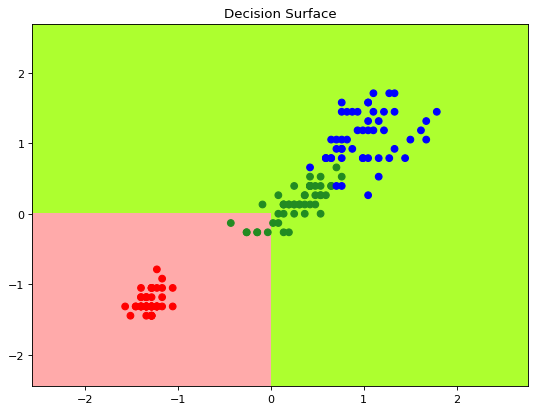

In [ ]:
decision_surface(dat,bnb)

##Logistic Regression

###Model

In [ ]:
lgr = LogisticRegression(solver='saga')
par = dict(C=uniform(loc=10**-6,scale=10**6),penalty=['l2','l1','elasticnet'])
rsearch = RandomizedSearchCV(lgr,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
pen = search.best_params_['penalty']
print("C = {} and penalty ={}".format(lamb,pen))

C = 548813.5039283248 and penalty =l1


In [ ]:
# Defining Model
lgr = LogisticRegression(penalty=pen,C=lamb,solver='saga')
lgr.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of Logistic Regression with C = {} and penalty = {} is {}".format(lamb,pen,find_accuracy(lgr)*100))

The accuracy of Logistic Regression with C = 548813.5039283248 and penalty = l1 is 96.66666666666667


###Decision Surface

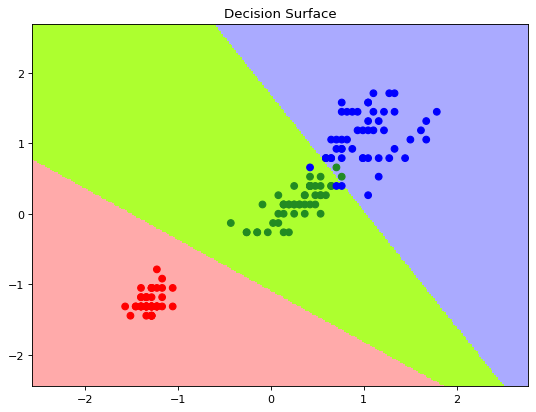

In [ ]:
decision_surface(dat,lgr)

##Linear SVC

###Model

In [ ]:
lsvc = svm.LinearSVC()
par = dict(C=uniform(loc=10**-6,scale=10**6),penalty=['l2','l1','elasticnet'])
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
pen = search.best_params_['penalty']
print("C = {} and penalty ={}".format(lamb,pen))

C = 87129.2997025407 and penalty =l2


In [ ]:
# Defining Model
lsvc = svm.LinearSVC(penalty=pen,C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of Linear SVC with C = {} and penalty = {} is {}".format(lamb,pen,find_accuracy(lgr)*100))

The accuracy of Linear SVC with C = 87129.2997025407 and penalty = l2 is 96.66666666666667


###Decision Surface

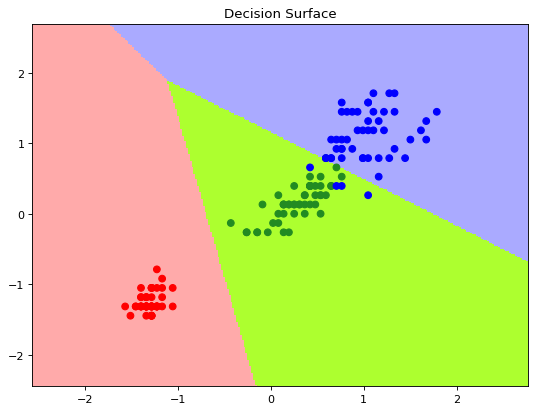

In [ ]:
decision_surface(dat,lsvc)

##SVC with Linear Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='linear',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
print("C = {}".format(lamb,pen))

C = 548813.5039283248


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='linear',C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with linear kernel with C = {} is {}".format(lamb,find_accuracy(lgr)*100))

The accuracy of SVC with linear kernel with C = 548813.5039283248 is 96.66666666666667


###Decision Surface

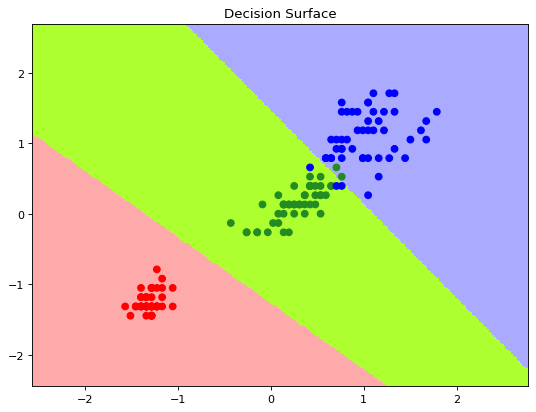

In [ ]:
decision_surface(dat,lsvc)

##SVC with rbf Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='rbf',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
print("C = {}".format(lamb,pen))

C = 548813.5039283248


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='rbf',C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with rbf kernel with C = {} is {}".format(lamb,find_accuracy(lgr)*100))

The accuracy of SVC with rbf kernel with C = 548813.5039283248 is 96.66666666666667


###Decision Surface

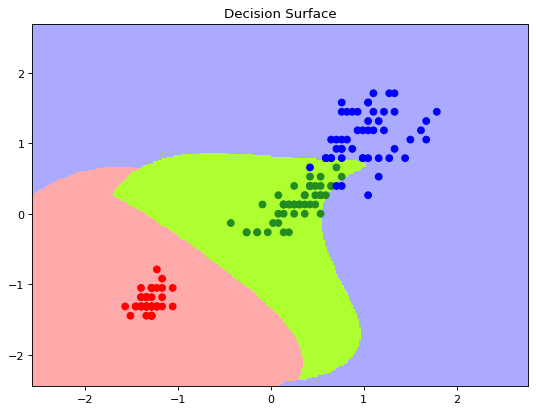

In [ ]:
decision_surface(dat,lsvc)

##SVC with Polynomial Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='poly',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6),degree=randint(low=0,high=100))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
deg = search.best_params_['degree']
print("C = {} and degree = {}".format(lamb,deg))

C = 71036.05819888694 and degree = 9


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='poly',C=lamb,degree=deg)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with Polynomial kernel with C = {} and degree = {} is {}".format(lamb,deg,find_accuracy(lgr)*100))

The accuracy of SVC with Polynomial kernel with C = 71036.05819888694 and degree = 9 is 96.66666666666667


###Decision Surface

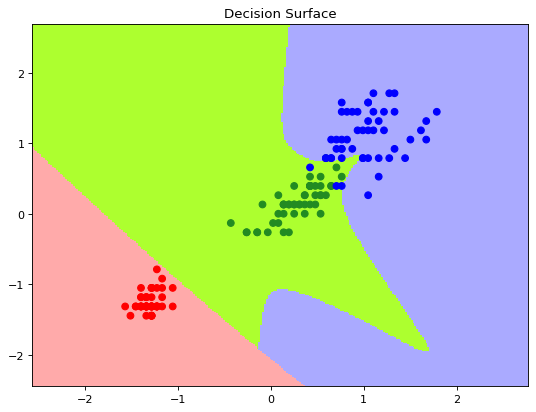

In [ ]:
decision_surface(dat,lsvc)

##Decision Tree

###Model

In [ ]:
tr = tree.DecisionTreeClassifier()
par = dict(max_depth = randint(low=1,high=100))
rsearch = RandomizedSearchCV(tr,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
dept = search.best_params_['max_depth']
print("Max depth = ",dept)

Max depth =  45


In [ ]:
tr = tree.DecisionTreeClassifier(max_depth=dept)
tr.fit(X_data,Y_data)
print("Accuracy of decision tree for depth = {} is {}".format(dept,find_accuracy(tr)*100))

Accuracy of decision tree for depth = 45 is 93.33333333333333


###Decision Surface

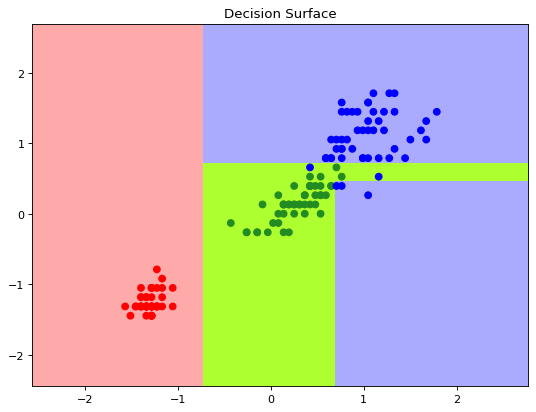

In [ ]:
decision_surface(dat,tr)

###Tree

[Text(125.55000000000001, 195.696, 'X[0] <= -0.744\ngini = 0.666\nsamples = 120\nvalue = [38, 39, 43]'),
 Text(83.7, 152.208, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(167.4, 152.208, 'X[1] <= 0.725\ngini = 0.499\nsamples = 82\nvalue = [0, 39, 43]'),
 Text(83.7, 108.72, 'X[0] <= 0.677\ngini = 0.124\nsamples = 45\nvalue = [0, 3, 42]'),
 Text(41.85, 65.232, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40]'),
 Text(125.55000000000001, 65.232, 'X[1] <= 0.462\ngini = 0.48\nsamples = 5\nvalue = [0, 3, 2]'),
 Text(83.7, 21.744, 'gini = 0.0\nsamples = 3\nvalue = [0, 3, 0]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(251.10000000000002, 108.72, 'X[0] <= 0.621\ngini = 0.053\nsamples = 37\nvalue = [0, 36, 1]'),
 Text(209.25, 65.232, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(292.95, 65.232, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]')]

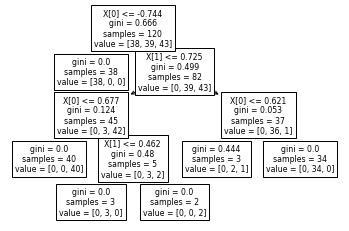

In [ ]:
tree.plot_tree(tr)

#For TSNE data

In [ ]:
X_data = iris_tsne_x_tr
Y_data = iris_tsne_y_tr
X_test = iris_tsne_x_test
Y_test = iris_tsne_y_test
dat = iris_tsne

##K-NN

###Model

In [ ]:
knn = KNeighborsClassifier()

# Using Random Search to find the best k

par = dict(n_neighbors=randint(low=1,high=50))

rsearch = RandomizedSearchCV(knn,param_distributions=par,cv=10,n_jobs=-1,random_state=0)
search = rsearch.fit(X_data,Y_data)
k=search.best_params_['n_neighbors']
print(k)

4


In [ ]:
# Making our model

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_data,Y_data)
print("Accuracy of the K-NN model with k = {} is {}".format(k,find_accuracy(knn)*100))

Accuracy of the K-NN model with k = 4 is 93.33333333333333


###Decision Surface

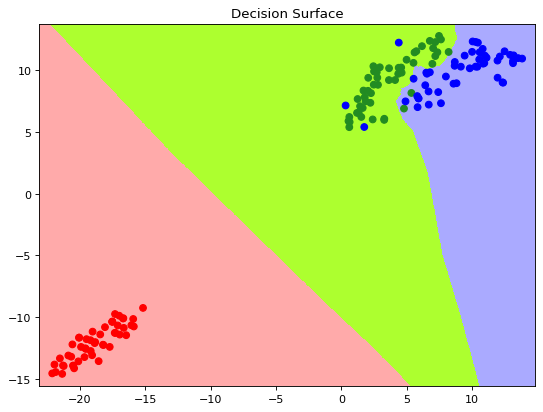

In [ ]:
decision_surface(dat,knn)

##Gaussian Naive Bayes

###Model

In [ ]:
gnb = GaussianNB()
gnb.fit(X_data,Y_data)
print("Accuracy of Gaussian Naive Bayes is ",find_accuracy(gnb)*100)

Accuracy of Gaussian Naive Bayes is  86.66666666666667


###Decision Surface

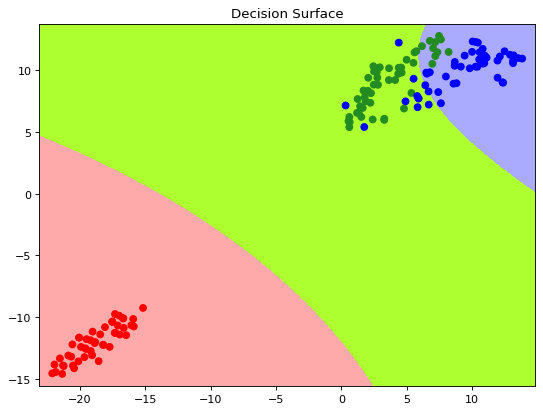

In [ ]:
decision_surface(dat,gnb)

##Bernoulli Naive Bayes

###Model

In [ ]:
bnb = BernoulliNB()
par = dict(alpha=uniform(loc=0,scale=1000))
rsearch = RandomizedSearchCV(bnb,par,cv=10)
search = rsearch.fit(X_data,Y_data)
alph = search.best_params_['alpha']
print(alph)

197.65140837772722


In [ ]:
# Defining Model
bnb = BernoulliNB(alpha=alph)
bnb.fit(X_data,Y_data)
print("The accuracy of Bernoulli Naive Bayes with alpha = {} is {}%".format(alph,find_accuracy(bnb)))

The accuracy of Bernoulli Naive Bayes with alpha = 197.65140837772722 is 0.6%


###Decision Surface

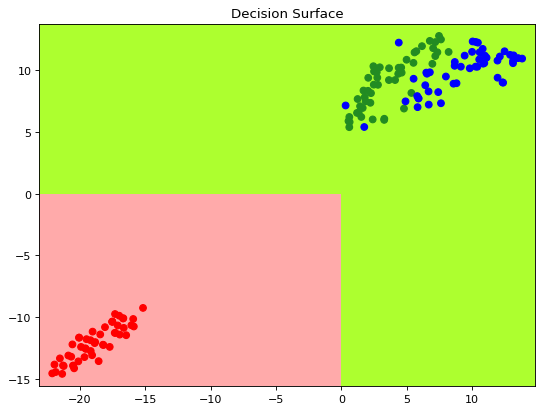

In [ ]:
decision_surface(dat,bnb)

##Logistic Regression

###Model

In [ ]:
lgr = LogisticRegression(solver='saga')
par = dict(C=uniform(loc=10**-6,scale=10**6),penalty=['l2','l1','elasticnet'])
rsearch = RandomizedSearchCV(lgr,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
pen = search.best_params_['penalty']
print("C = {} and penalty ={}".format(lamb,pen))

C = 548813.5039283248 and penalty =l1


In [ ]:
# Defining Model
lgr = LogisticRegression(penalty=pen,C=lamb,solver='saga')
lgr.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of Logistic Regression with C = {} and penalty = {} is {}".format(lamb,pen,find_accuracy(lgr)*100))

The accuracy of Logistic Regression with C = 548813.5039283248 and penalty = l1 is 93.33333333333333


###Decision Surface

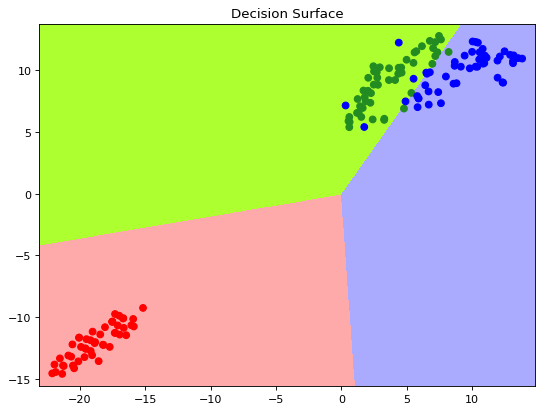

In [ ]:
decision_surface(dat,lgr)

##Linear SVC

###Model

In [ ]:
lsvc = svm.LinearSVC()
par = dict(C=uniform(loc=10**-6,scale=10**6),penalty=['l2','l1','elasticnet'])
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
pen = search.best_params_['penalty']
print("C = {} and penalty ={}".format(lamb,pen))

C = 56712.97731844318 and penalty =l2


In [ ]:
# Defining Model
lsvc = svm.LinearSVC(penalty=pen,C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of Linear SVC with C = {} and penalty = {} is {}".format(lamb,pen,find_accuracy(lgr)*100))

The accuracy of Linear SVC with C = 56712.97731844318 and penalty = l2 is 93.33333333333333


###Decision Surface

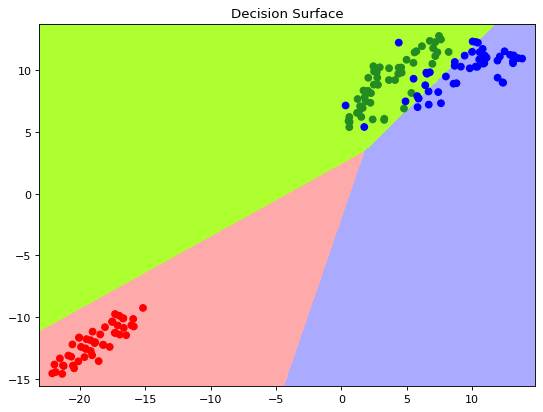

In [ ]:
decision_surface(dat,lsvc)

##SVC with Linear Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='linear',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
print("C = {}".format(lamb,pen))

C = 548813.5039283248


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='linear',C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with linear kernel with C = {} is {}".format(lamb,find_accuracy(lgr)*100))

The accuracy of SVC with linear kernel with C = 548813.5039283248 is 93.33333333333333


###Decision Surface

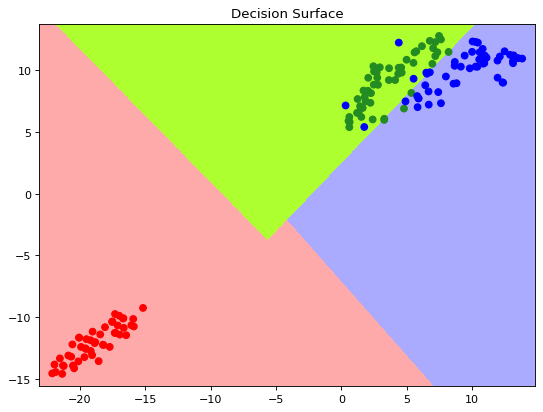

In [ ]:
decision_surface(dat,lsvc)

##SVC with rbf Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='rbf',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
print("C = {}".format(lamb,pen))

C = 548813.5039283248


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='rbf',C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with rbf kernel with C = {} is {}".format(lamb,find_accuracy(lgr)*100))

The accuracy of SVC with rbf kernel with C = 548813.5039283248 is 93.33333333333333


###Decision Surface

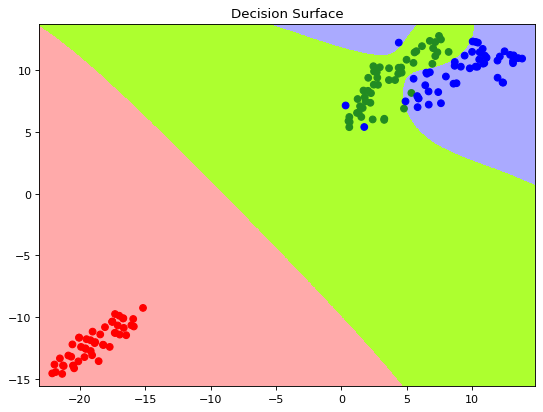

In [ ]:
decision_surface(dat,lsvc)

##SVC with Polynomial Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='poly',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6),degree=randint(low=0,high=100))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
deg = search.best_params_['degree']
print("C = {} and degree = {}".format(lamb,deg))

C = 71036.05819888694 and degree = 9


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='poly',C=lamb,degree=deg)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with Polynomial kernel with C = {} and degree = {} is {}".format(lamb,deg,find_accuracy(lgr)*100))

The accuracy of SVC with Polynomial kernel with C = 71036.05819888694 and degree = 9 is 93.33333333333333


###Decision Surface

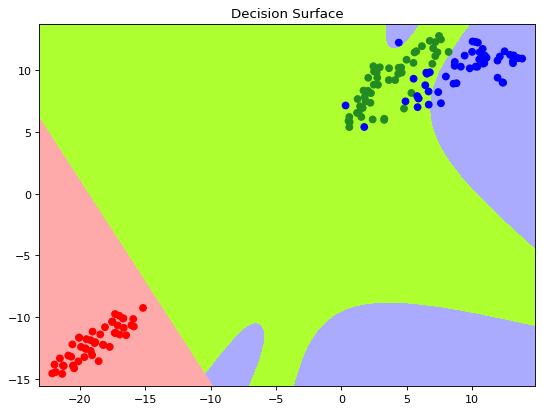

In [ ]:
decision_surface(dat,lsvc)

##Decision Tree

###Model

In [ ]:
tr = tree.DecisionTreeClassifier()
par = dict(max_depth = randint(low=1,high=100))
rsearch = RandomizedSearchCV(tr,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
dept = search.best_params_['max_depth']
print("Max depth = ",dept)

Max depth =  65


In [ ]:
tr = tree.DecisionTreeClassifier(max_depth=dept)
tr.fit(X_data,Y_data)
print("Accuracy of decision tree for depth = {} is {}".format(dept,find_accuracy(tr)*100))

Accuracy of decision tree for depth = 65 is 93.33333333333333


###Decision Surface

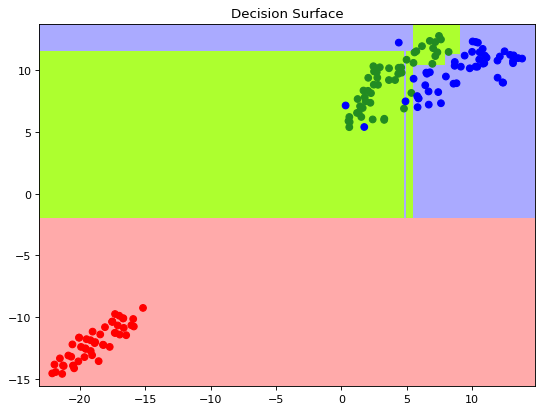

In [ ]:
decision_surface(dat,tr)

###Tree

[Text(125.55000000000001, 199.32, 'X[1] <= -1.929\ngini = 0.665\nsamples = 120\nvalue = [38, 38, 44]'),
 Text(97.65, 163.07999999999998, 'gini = 0.0\nsamples = 38\nvalue = [38, 0, 0]'),
 Text(153.45000000000002, 163.07999999999998, 'X[0] <= 5.526\ngini = 0.497\nsamples = 82\nvalue = [0, 38, 44]'),
 Text(83.7, 126.83999999999999, 'X[1] <= 11.549\ngini = 0.102\nsamples = 37\nvalue = [0, 2, 35]'),
 Text(55.800000000000004, 90.6, 'X[0] <= 4.855\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]'),
 Text(27.900000000000002, 54.359999999999985, 'gini = 0.0\nsamples = 32\nvalue = [0, 0, 32]'),
 Text(83.7, 54.359999999999985, 'X[0] <= 4.954\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(55.800000000000004, 18.119999999999976, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(111.60000000000001, 18.119999999999976, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(111.60000000000001, 90.6, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(223.20000000000002, 126.83999999999999, 'X

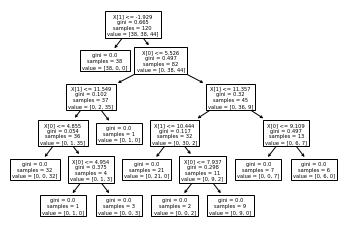

In [ ]:
tree.plot_tree(tr)

#For PCA data

In [ ]:
X_data = iris_pca_x_tr
Y_data = iris_pca_y_tr
X_test = iris_pca_x_test
Y_test = iris_pca_y_test
dat = iris_pca

##K-NN

###Model

In [ ]:
knn = KNeighborsClassifier()

# Using Random Search to find the best k

par = dict(n_neighbors=randint(low=1,high=50))

rsearch = RandomizedSearchCV(knn,param_distributions=par,cv=10,n_jobs=-1,random_state=0)
search = rsearch.fit(X_data,Y_data)
k=search.best_params_['n_neighbors']
print(k)

20


In [ ]:
# Making our model

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_data,Y_data)
print("Accuracy of the K-NN model with k = {} is {}".format(k,find_accuracy(knn)*100))

Accuracy of the K-NN model with k = 20 is 83.33333333333334


###Decision Surface

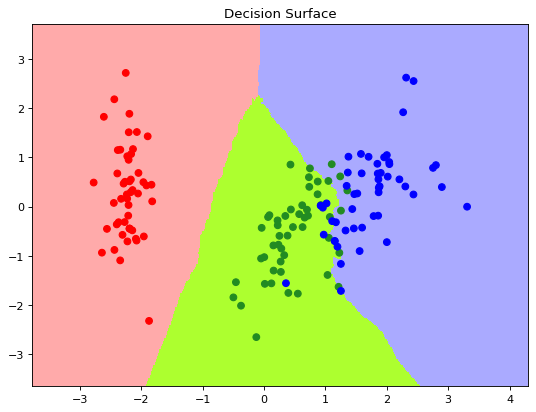

In [ ]:
decision_surface(dat,knn)

##Gaussian Naive Bayes

###Model

In [ ]:
gnb = GaussianNB()
gnb.fit(X_data,Y_data)
print("Accuracy of Gaussian Naive Bayes is ",find_accuracy(gnb)*100)

Accuracy of Gaussian Naive Bayes is  80.0


###Decision Surface

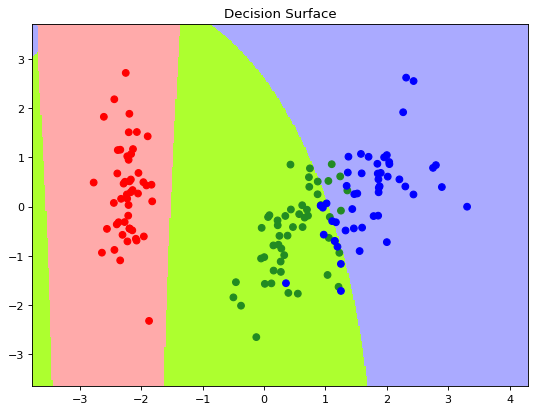

In [ ]:
decision_surface(dat,gnb)

##Bernoulli Naive Bayes

###Model

In [ ]:
bnb = BernoulliNB()
par = dict(alpha=uniform(loc=0,scale=1000))
rsearch = RandomizedSearchCV(bnb,par,cv=10)
search = rsearch.fit(X_data,Y_data)
alph = search.best_params_['alpha']
print(alph)

136.47480455804373


In [ ]:
# Defining Model
bnb = BernoulliNB(alpha=alph)
bnb.fit(X_data,Y_data)
print("The accuracy of Bernoulli Naive Bayes with alpha = {} is {}%".format(alph,find_accuracy(bnb)))

The accuracy of Bernoulli Naive Bayes with alpha = 136.47480455804373 is 0.6333333333333333%


###Decision Surface

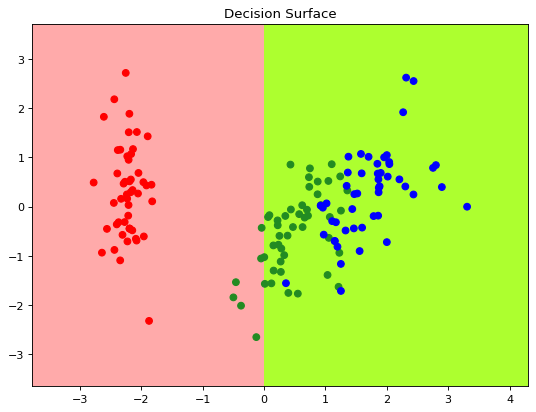

In [ ]:
decision_surface(dat,bnb)

##Logistic Regression

###Model

In [ ]:
lgr = LogisticRegression(solver='saga')
par = dict(C=uniform(loc=10**-6,scale=10**6),penalty=['l2','l1','elasticnet'])
rsearch = RandomizedSearchCV(lgr,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
pen = search.best_params_['penalty']
print("C = {} and penalty ={}".format(lamb,pen))

C = 548813.5039283248 and penalty =l1


In [ ]:
# Defining Model
lgr = LogisticRegression(penalty=pen,C=lamb,solver='saga')
lgr.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of Logistic Regression with C = {} and penalty = {} is {}".format(lamb,pen,find_accuracy(lgr)*100))

The accuracy of Logistic Regression with C = 548813.5039283248 and penalty = l1 is 86.66666666666667


###Decision Surface

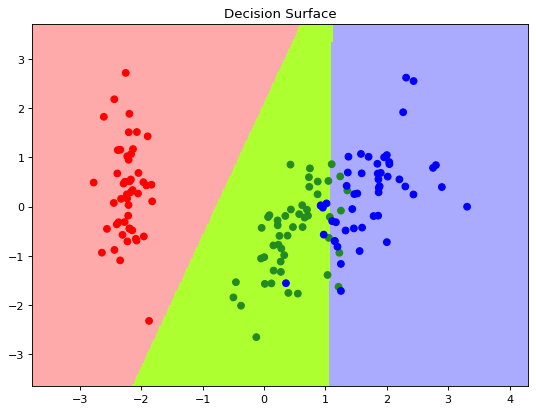

In [ ]:
decision_surface(dat,lgr)

##Linear SVC

###Model

In [ ]:
lsvc = svm.LinearSVC()
par = dict(C=uniform(loc=10**-6,scale=10**6),penalty=['l2','l1','elasticnet'])
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
pen = search.best_params_['penalty']
print("C = {} and penalty ={}".format(lamb,pen))

C = 836078.7635383776 and penalty =l2


In [ ]:
# Defining Model
lsvc = svm.LinearSVC(penalty=pen,C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of Linear SVC with C = {} and penalty = {} is {}".format(lamb,pen,find_accuracy(lgr)*100))

The accuracy of Linear SVC with C = 836078.7635383776 and penalty = l2 is 86.66666666666667


###Decision Surface

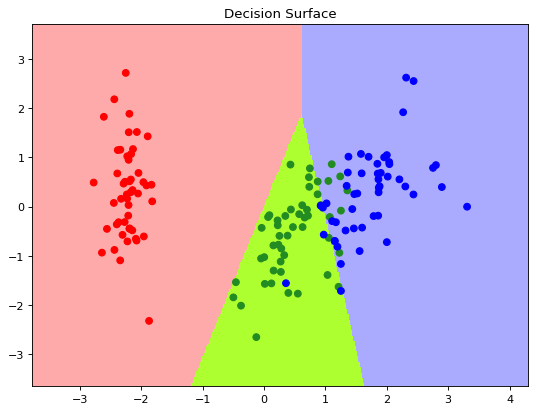

In [ ]:
decision_surface(dat,lsvc)

##SVC with Linear Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='linear',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
print("C = {}".format(lamb,pen))

C = 423654.79933990474


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='linear',C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with linear kernel with C = {} is {}".format(lamb,find_accuracy(lgr)*100))

The accuracy of SVC with linear kernel with C = 423654.79933990474 is 86.66666666666667


###Decision Surface

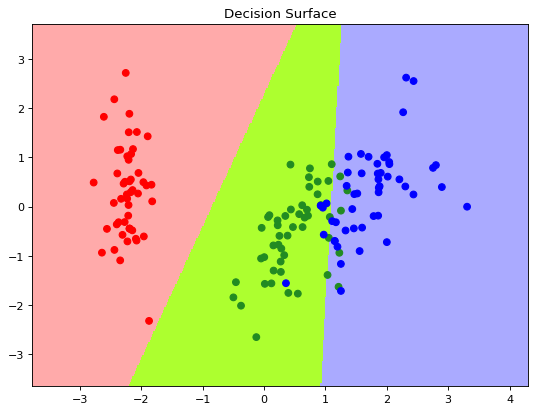

In [ ]:
decision_surface(dat,lsvc)

##SVC with rbf Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='rbf',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
print("C = {}".format(lamb,pen))

C = 437587.21126369253


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='rbf',C=lamb)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with rbf kernel with C = {} is {}".format(lamb,find_accuracy(lgr)*100))

The accuracy of SVC with rbf kernel with C = 437587.21126369253 is 86.66666666666667


###Decision Surface

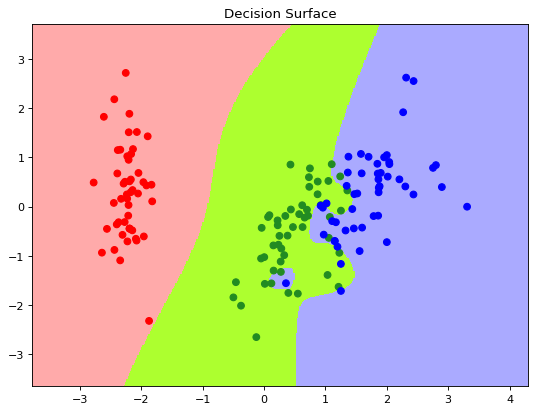

In [ ]:
decision_surface(dat,lsvc)

##SVC with Polynomial Kernel

###Model

In [ ]:
lsvc = svm.SVC(kernel='poly',max_iter=1000)
par = dict(C=uniform(loc=10**-6,scale=10**6),degree=randint(low=0,high=100))
rsearch = RandomizedSearchCV(lsvc,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
lamb = search.best_params_['C']
deg = search.best_params_['degree']
print("C = {} and degree = {}".format(lamb,deg))

C = 392784.79610182974 and degree = 25


In [ ]:
# Defining Model
lsvc = svm.SVC(kernel='poly',C=lamb,degree=deg)
lsvc.fit(np.array(X_data),np.array(Y_data))
print("The accuracy of SVC with Polynomial kernel with C = {} and degree = {} is {}".format(lamb,deg,find_accuracy(lgr)*100))

The accuracy of SVC with Polynomial kernel with C = 392784.79610182974 and degree = 25 is 86.66666666666667


###Decision Surface

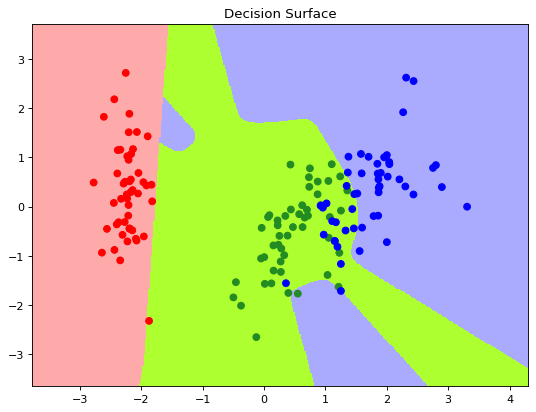

In [ ]:
decision_surface(dat,lsvc)

##Decision Tree

###Model

In [ ]:
tr = tree.DecisionTreeClassifier()
par = dict(max_depth = randint(low=1,high=100))
rsearch = RandomizedSearchCV(tr,par,cv=10,random_state=0)
search = rsearch.fit(X_data,Y_data)
dept = search.best_params_['max_depth']
print("Max depth = ",dept)

Max depth =  48


In [ ]:
tr = tree.DecisionTreeClassifier(max_depth=dept)
tr.fit(X_data,Y_data)
print("Accuracy of decision tree for depth = {} is {}".format(dept,find_accuracy(tr)*100))

Accuracy of decision tree for depth = 48 is 90.0


###Decision Surface

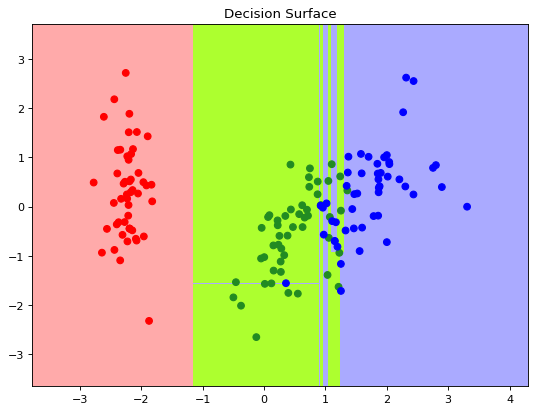

In [ ]:
decision_surface(dat,tr)

###Tree

[Text(157.5529411764706, 201.90857142857143, 'X[0] <= -1.159\ngini = 0.665\nsamples = 120\nvalue = [37, 44, 39]'),
 Text(137.85882352941178, 170.84571428571428, 'gini = 0.0\nsamples = 37\nvalue = [37, 0, 0]'),
 Text(177.24705882352941, 170.84571428571428, 'X[0] <= 1.092\ngini = 0.498\nsamples = 83\nvalue = [0, 44, 39]'),
 Text(98.47058823529412, 139.78285714285715, 'X[0] <= 0.9\ngini = 0.18\nsamples = 40\nvalue = [0, 4, 36]'),
 Text(59.082352941176474, 108.72, 'X[1] <= -1.55\ngini = 0.061\nsamples = 32\nvalue = [0, 1, 31]'),
 Text(39.38823529411765, 77.65714285714284, 'X[1] <= -1.567\ngini = 0.278\nsamples = 6\nvalue = [0, 1, 5]'),
 Text(19.694117647058825, 46.59428571428572, 'gini = 0.0\nsamples = 5\nvalue = [0, 0, 5]'),
 Text(59.082352941176474, 46.59428571428572, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(78.7764705882353, 77.65714285714284, 'gini = 0.0\nsamples = 26\nvalue = [0, 0, 26]'),
 Text(137.85882352941178, 108.72, 'X[0] <= 1.028\ngini = 0.469\nsamples = 8\nvalue =

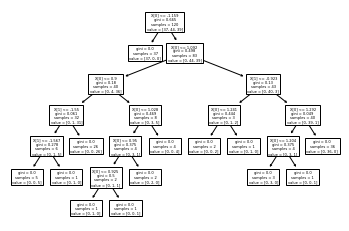

In [ ]:
tree.plot_tree(tr)